In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd
from run_model_stan_wrapper import parse_stan_output
from intersect_hets import summary_statistics
import math

In [2]:
def theta(workDir,filters):
    samples=['HG00096','HG00097','HG00250','NA19247','NA19257']
    fig, axs = plt.subplots(1, 5,figsize=(16,3))
    i=0
    for sample in samples:
        outDir=workDir+sample+"/output/"+filters
        outfilename=outDir+"/"+sample+"_ASE_all.tsv"
        ASE_all=pd.read_csv(outfilename,sep="\t",header=0,index_col=False)
        # plot
        X=ASE_all['posterior_median'].tolist()
        #logX = log(X)
        axs[i].hist(ASE_all['posterior_median'],bins=30)
        axs[i].set_title(str(sample))
        axs[i].set_ylabel(r"${\Theta}$")
        i+=1
        print(sample+" :")
        print("\t max:"+str(max(X))+"; min:"+str(min(X))+"; size:"+str(len(X)))
    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()
    

In [3]:
def common_theta(workDir,filters):
    samples=['HG00096','HG00097','HG00250','NA19247','NA19257']
    df1=pd.read_csv(workDir+samples[0]+"/output/"+filters+"/"+samples[0]+"_ASE_all.tsv",sep="\t",header=0,index_col=False)
    df2=pd.read_csv(workDir+samples[1]+"/output/"+filters+"/"+samples[1]+"_ASE_all.tsv",sep="\t",header=0,index_col=False)
    df3=pd.read_csv(workDir+samples[2]+"/output/"+filters+"/"+samples[2]+"_ASE_all.tsv",sep="\t",header=0,index_col=False)
    df4=pd.read_csv(workDir+samples[3]+"/output/"+filters+"/"+samples[3]+"_ASE_all.tsv",sep="\t",header=0,index_col=False)
    df5=pd.read_csv(workDir+samples[4]+"/output/"+filters+"/"+samples[4]+"_ASE_all.tsv",sep="\t",header=0,index_col=False)
    df12 = pd.merge(df1, df2, how='inner', on=['gene_ID'])
    df123 = pd.merge(df12, df3, how='inner', on=['gene_ID'])
    df1234 = pd.merge(df123, df4, how='inner', on=['gene_ID'])
    df12345 = pd.merge(df1234, df5, how='inner', on=['gene_ID'])
    intersected_geneID=df12345['gene_ID']
    print("Overlapped gene list size:"+str(intersected_geneID.size))
          
    fig, axs = plt.subplots(1, 5,figsize=(16,3))
    i=0
    for sample in samples:
        outDir=workDir+sample+"/output/"+filters
        outfilename=outDir+"/"+sample+"_ASE_all.tsv"
        ASE_all=pd.read_csv(outfilename,sep="\t",header=0,index_col=False)
        ASE_common = pd.merge(intersected_geneID, ASE_all, how='inner', on=['gene_ID'])
        # plot
        X=ASE_common['posterior_median'].tolist()
        axs[i].hist(ASE_common['posterior_median'],bins=30)
        #logX = np.log2(X)
        #axs[i].hist(logX,bins=30)
        axs[i].set_title(str(sample))
        axs[i].set_ylabel(r"${\Theta}$")
        #axs[i].set_xlim(0,38)
        i+=1
        print(sample+" :\t max:"+str(max(X))+"; min:"+str(min(X))+"; var:"+str(ASE_common.var()['posterior_median'])+"; size:"+str(len(X)))
    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

In [5]:
def common_ASE(workDir,filters):
    samples=['HG00096','HG00097','HG00250','NA19247','NA19257']
    df1=pd.read_csv(workDir+samples[0]+"/output/"+filters+"/"+samples[0]+"_ASE_cutoff_0.5_filtered.tsv",sep="\t",header=0,index_col=False)
    df2=pd.read_csv(workDir+samples[1]+"/output/"+filters+"/"+samples[1]+"_ASE_cutoff_0.5_filtered.tsv",sep="\t",header=0,index_col=False)
    df3=pd.read_csv(workDir+samples[2]+"/output/"+filters+"/"+samples[2]+"_ASE_cutoff_0.5_filtered.tsv",sep="\t",header=0,index_col=False)
    df4=pd.read_csv(workDir+samples[3]+"/output/"+filters+"/"+samples[3]+"_ASE_cutoff_0.5_filtered.tsv",sep="\t",header=0,index_col=False)
    df5=pd.read_csv(workDir+samples[4]+"/output/"+filters+"/"+samples[4]+"_ASE_cutoff_0.5_filtered.tsv",sep="\t",header=0,index_col=False)
    df12 = pd.merge(df1, df2, how='inner', on=['gene_ID'])
    df123 = pd.merge(df12, df3, how='inner', on=['gene_ID'])
    df1234 = pd.merge(df123, df4, how='inner', on=['gene_ID'])
    df12345 = pd.merge(df1234, df5, how='inner', on=['gene_ID'])
    intersected_geneID=df12345['gene_ID']
    print("Overlapped gene list size:"+str(intersected_geneID.size))
          
    fig, axs = plt.subplots(1, 5,figsize=(16,3))
    i=0
    for sample in samples:
        outDir=workDir+sample+"/output/"+filters
        outfilename=outDir+"/"+sample+"_ASE_all.tsv"
        ASE_all=pd.read_csv(outfilename,sep="\t",header=0,index_col=False)
        ASE_common = pd.merge(intersected_geneID, ASE_all, how='inner', on=['gene_ID'])
        # plot
        X=ASE_common['posterior_median'].tolist()
        #logX = np.log2(X)
        #axs[i].hist(logX,bins=30)
        axs[i].hist(ASE_common['posterior_median'],bins=30)
        axs[i].set_title(str(sample))
        axs[i].set_xlim(0,19)
        axs[i].set_ylabel(r"${\Theta}$")
        i+=1
        print(sample+" :\t max:"+str(max(X))+"; min:"+str(min(X))+"; size:"+str(len(X)))
    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()
    fig.suptitle('Distribution of posterior theta') # or plt.suptitle('Main title')
    plt.show()

In [ ]:
filters="s-0.5_a-0.05_sinCov0_totCov1_W1000K1000"
workDir="/Users/scarlett/Documents/Allen_lab/github/BEASTIE/other_example/"

### 1. theta plot

HG00096 :
	 max:16.483; min:0.031; size:5239
HG00097 :
	 max:25.49; min:0.011000000000000001; size:9178
HG00250 :
	 max:18.245; min:0.016; size:8946
NA19247 :
	 max:37.214; min:0.02; size:10735
NA19257 :
	 max:21.335; min:0.019; size:10712


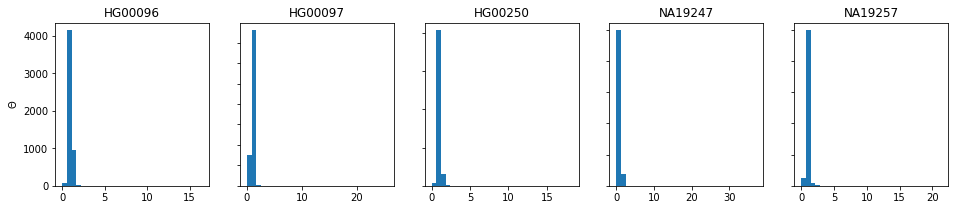

In [106]:
theta(workDir,filters)

### 2. common theta plot

Overlapped gene list size:1630
HG00096 :	 max:16.483; min:0.132; var:0.19326989209986178; size:1630
HG00097 :	 max:7.23; min:0.102; var:0.0758363641678624; size:1630
HG00250 :	 max:18.245; min:0.094; var:0.22569285567946012; size:1630
NA19247 :	 max:18.298; min:0.049; var:0.2538428391628722; size:1630
NA19257 :	 max:6.093; min:0.152; var:0.08506746457610714; size:1630


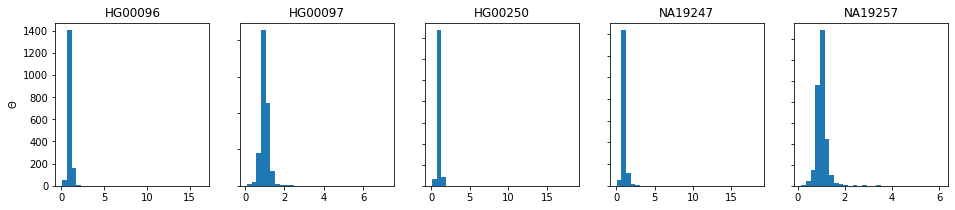

In [110]:
common_theta(workDir,filters)